Importing required modules.

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Mounting G-drive. Or comment it if connected already.

In [335]:
#from google.colab import drive
#drive.mount('/content/drive')

Importing datasets. Provide the correct path file as per your system.

In [336]:
df_original = pd.read_csv('/content/drive/MyDrive/ChaiCode/DS_with_priya_bhatia/SuperStore_Dataset.csv')
df = df_original.copy()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


A glance at the dataset

In [337]:
print(f'The shape of the superStore dataset is {df.shape}', end = '\n\n')
df.head(3)

The shape of the superStore dataset is (10014, 21)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.0,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,6.8714


In [338]:
df.info()  # usually used to see dtypes. Pandas is truncating the output when there are too many columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

From above we can infer that
*   Initial shape of df is : 10014 x 21
*   Order Date, Ship Date, Postal Code, Quantity datatypes needs to be changed.
*   Ship Mode and Quantity have null values.

Correcting the dtypes fo columns

In [339]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# given postal code is string of length 5.
df['Postal Code'] = df['Postal Code'].apply( lambda x: str(x).zfill(5) if pd.notna(x) else np.nan )
# convert each postal code to str and then zfill is a string method that pads it with leading zeros only if it's shorter than 5 characters.

df['Quantity'] = df['Quantity'].astype('Int64') # Capital "I". This uses pandas' nullable integer type, which supports NaN.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10014 non-null  int64         
 1   Order ID       10014 non-null  object        
 2   Order Date     10014 non-null  datetime64[ns]
 3   Ship Date      10014 non-null  datetime64[ns]
 4   Ship Mode      9916 non-null   object        
 5   Customer ID    10014 non-null  object        
 6   Customer Name  10014 non-null  object        
 7   Segment        10014 non-null  object        
 8   Country        10014 non-null  object        
 9   City           10014 non-null  object        
 10  State          10014 non-null  object        
 11  Postal Code    10014 non-null  object        
 12  Region         10014 non-null  object        
 13  Product ID     10014 non-null  object        
 14  Category       10014 non-null  object        
 15  Sub-Category   1001

In [340]:
print(df[['Order Date', 'Ship Date', 'Postal Code', 'Quantity']].head(1))

  Order Date  Ship Date Postal Code  Quantity
0 2016-11-08 2016-11-11       42420         2


In [341]:
null_col = df.isna().sum() # returns series with index=column name and value=missing value count in that column.
print(null_col [null_col>0].to_string())

Ship Mode    98
Quantity     18


Removing duplicates

In [342]:
df_duplicates = df[df.duplicated()]
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')
df_duplicates

There are 17 duplicate rows in the dataset.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
9994,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
9995,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
9996,18,CA-2014-167164,2014-05-13,2014-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,84084,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500,2,0.0,9.9900
9997,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824
9999,21,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840
10001,8853,CA-2014-119977,2014-10-08,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,...,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4,0.0,55.7640
10002,8854,US-2015-115343,2015-09-22,2015-09-25,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,...,19143,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,5,0.2,6.2550
10003,8855,US-2015-115343,2015-09-22,2015-09-25,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,...,19143,East,TEC-AC-10003832,Technology,Accessories,Logitech�P710e Mobile Speakerphone,617.976,3,0.2,-7.7247
10004,1043,CA-2016-102981,2016-09-06,2016-09-09,Second Class,MO-17500,Mary O'Rourke,Consumer,United States,New York City,...,10035,East,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",722.352,3,0.2,90.2940
10006,1045,CA-2017-115651,2017-07-09,2017-07-12,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,...,60610,Central,OFF-AP-10000055,Office Supplies,Appliances,Belkin F9S820V06 8 Outlet Surge,58.464,9,0.8,-146.1600


Dropping the duplicates rows

In [343]:
df = df.drop_duplicates()
print(f'The shape of the superStore dataset is {df.shape}', end = '\n\n')
df[df.duplicated()]

The shape of the superStore dataset is (9997, 21)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit


Row ID is a unique feature.

Check if it has any duplicates.

In [344]:
duplicate_row_numbers = df[df.duplicated(subset = ['Row ID'], keep=False)].sort_values('Row ID') # keep False displays both original and duplicate row.
print(duplicate_row_numbers.shape, end = '\n\n')
duplicate_row_numbers

(6, 21)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,<NA>,0.2,16.0110
9998,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
1043,1044,CA-2017-115651,2017-07-09,2017-07-12,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,...,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",8.840,5,0.2,2.9835
10005,1044,CA-2017-115651,2017-07-09,2017-07-12,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,...,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5,0.2,2.9835
8851,8852,CA-2015-140718,2015-07-02,2015-07-04,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,...,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,9.392,2,0.2,3.2872
10000,8852,CA-2015-140718,2015-07-02,2015-07-04,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,...,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,-9.392,2,0.2,3.2872


We can see that these are also duplicate rows only, but in some either the quantity is NaN or sales price is negative which treats it as different rows.

Hence we will be dropping the row with Nan Quantity and -ve sales Price.

In [345]:
df = df.drop(df[(df['Row ID'] == 20) & (df['Quantity'].isna())].index) # .index gets the row label(s) to drop.
df = df.drop(df[(df['Row ID'].isin([1044, 8852])) & (df['Sales Price'] < 0)].index)
df.loc[df['Row ID'].isin([20, 1044, 8852])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
1043,1044,CA-2017-115651,2017-07-09,2017-07-12,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,...,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",8.840,5,0.2,2.9835
8851,8852,CA-2015-140718,2015-07-02,2015-07-04,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,...,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,9.392,2,0.2,3.2872
9998,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110


In [346]:
print(f'So, our final shape of datashape is {df.shape}')

So, our final shape of datashape is (9994, 21)


●	Extracting year from Order ID and comparing with year in the Order Date

In [347]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


Checking which rows have Order date > Ship date or Order ID Year != Order date Year.

In [348]:
# Step 1: Extract year from 'Order ID'
df['Order ID Year'] = df['Order ID'].str.split('-').str[1].astype(int)

# Step 2: Extract year from 'Order Date'
df['Order Date Year'] = df['Order Date'].dt.year

# Step 3: Filter rows where orderID year != OrderDateYear OR OrderDate > ShipDate. Because shipping cannot hapen before ordering.
mismatched_dates = df[(df['Order ID Year'] != df['Order Date Year']) | (df['Order Date'] > df['Ship Date'])]

mismatched_rows = mismatched_dates['Row ID'] # stored all the row IDs of mismatched rows.
print(f'mismatched_dates.shape {mismatched_dates.shape}')
mismatched_dates[['Row ID', 'Order ID', 'Order Date', 'Ship Date']].T

mismatched_dates.shape (40, 23)


,62,63,64,65,943,944,945,1152,1153,2752,...,5738,6341,6387,6388,8586,8587,8595,8596,9942,9943
Row ID,63,64,65,66,944,945,946,1153,1154,2753,...,5739,6342,6388,6389,8587,8588,8596,8597,9943,9944
Order ID,CA-2015-135545,CA-2015-135545,CA-2015-135545,CA-2015-135545,CA-2015-120880,CA-2015-120880,CA-2015-120880,CA-2017-160395,CA-2017-160395,CA-2015-155306,...,CA-2017-156139,US-2017-105830,CA-2014-134103,CA-2014-134103,CA-2017-162015,CA-2017-162015,CA-2014-111934,CA-2014-111934,CA-2014-143371,CA-2014-143371
Order Date,2017-11-24 00:00:00,2017-11-24 00:00:00,2017-11-24 00:00:00,2017-11-24 00:00:00,2013-05-29 00:00:00,2013-05-29 00:00:00,2013-05-29 00:00:00,2016-12-31 00:00:00,2016-12-31 00:00:00,1999-04-17 00:00:00,...,2016-12-31 00:00:00,2016-12-31 00:00:00,2017-01-30 00:00:00,2017-01-30 00:00:00,2015-07-11 00:00:00,2015-07-11 00:00:00,2029-05-05 00:00:00,2029-05-05 00:00:00,2019-12-28 00:00:00,2019-12-28 00:00:00
Ship Date,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-06-03 00:00:00,2015-06-03 00:00:00,2015-06-03 00:00:00,2017-01-06 00:00:00,2017-01-06 00:00:00,2015-04-21 00:00:00,...,2017-01-06 00:00:00,2017-01-02 00:00:00,2014-02-04 00:00:00,2014-02-04 00:00:00,2017-07-18 00:00:00,2017-07-18 00:00:00,2014-05-07 00:00:00,2014-05-07 00:00:00,2015-01-03 00:00:00,2015-01-03 00:00:00


Correcting the Order Date and Order ID Year.

In [349]:
import pandas as pd
from datetime import datetime

# Apply logic per row
for idx, row in mismatched_dates.iterrows():
    ORD = row['Order Date']
    SPD = row['Ship Date']
    ORY = row['Order Date'].year
    SPY = row['Ship Date'].year
    ORIDY = int(row['Order ID'].split('-')[-1])

    if ORY > SPY:
        if ORIDY > SPY:
            # Replace ORIDY and ORY by SPY
            df.at[idx, 'Order ID'] = '-'.join([df.at[idx, 'Order ID'].split('-')[0], str(SPY), df.at[idx, 'Order ID'].split('-')[2]]) # join() stitches them back together into the updated format.
            df.at[idx, 'Order Date'] = df.at[idx, 'Order Date'].replace(year=SPY)
        else:
            # Replace Order Date Year with Order ID Year
            df.at[idx, 'Order Date'] = df.at[idx, 'Order Date'].replace(year=ORIDY)

        # If Order Date is after Ship Date, adjust it
        if ORD > SPD:
          df.at[idx, 'Order Date'] = df.at[idx, 'Order Date'].replace(year=SPY)

    else:
        if ORIDY != ORY:
          # Replace Order ID Year with Order Date Year
          df.at[idx, 'Order ID'] = '-'.join([df.at[idx, 'Order ID'].split('-')[0], str(ORY), df.at[idx, 'Order ID'].split('-')[2]])

        # If Order Date is after Ship Date, adjust it
        if ORD > SPD:
            df.at[idx, 'Order Date'] = df.at[idx, 'Order Date'].replace(year=SPY)


#print and cross check the dates.
matching_df = df[df['Row ID'].isin(mismatched_rows)]
print(f'matching_df.shape {matching_df.shape}')
matching_df[['Row ID', 'Order ID', 'Order Date', 'Ship Date']].T

matching_df.shape (40, 23)


,62,63,64,65,943,944,945,1152,1153,2752,...,5738,6341,6387,6388,8586,8587,8595,8596,9942,9943
Row ID,63,64,65,66,944,945,946,1153,1154,2753,...,5739,6342,6388,6389,8587,8588,8596,8597,9943,9944
Order ID,CA-2015-135545,CA-2015-135545,CA-2015-135545,CA-2015-135545,CA-2013-120880,CA-2013-120880,CA-2013-120880,CA-2016-160395,CA-2016-160395,CA-1999-155306,...,CA-2016-156139,US-2016-105830,CA-2014-134103,CA-2014-134103,CA-2015-162015,CA-2015-162015,CA-2014-111934,CA-2014-111934,CA-2015-143371,CA-2015-143371
Order Date,2015-11-24 00:00:00,2015-11-24 00:00:00,2015-11-24 00:00:00,2015-11-24 00:00:00,2013-05-29 00:00:00,2013-05-29 00:00:00,2013-05-29 00:00:00,2016-12-31 00:00:00,2016-12-31 00:00:00,1999-04-17 00:00:00,...,2016-12-31 00:00:00,2016-12-31 00:00:00,2014-01-30 00:00:00,2014-01-30 00:00:00,2015-07-11 00:00:00,2015-07-11 00:00:00,2014-05-05 00:00:00,2014-05-05 00:00:00,2015-12-28 00:00:00,2015-12-28 00:00:00
Ship Date,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-11-30 00:00:00,2015-06-03 00:00:00,2015-06-03 00:00:00,2015-06-03 00:00:00,2017-01-06 00:00:00,2017-01-06 00:00:00,2015-04-21 00:00:00,...,2017-01-06 00:00:00,2017-01-02 00:00:00,2014-02-04 00:00:00,2014-02-04 00:00:00,2017-07-18 00:00:00,2017-07-18 00:00:00,2014-05-07 00:00:00,2014-05-07 00:00:00,2015-01-03 00:00:00,2015-01-03 00:00:00


In [350]:
# drop Order ID Year and Oder Date Year
df = df.drop(columns=['Order ID Year', 'Order Date Year'])
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


Imputing Ship Mode null values.

In [351]:
# Step1: See how many days are there in Days_to_ship.
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days
ship_mode_null = df[df['Ship Mode'].isna()][['Row ID', 'Days to Ship', 'Ship Mode']]
ship_mode_null.T

,366,367,368,369,459,460,461,462,463,464,...,8895,8896,8897,9655,9656,9657,9658,9871,9872,9875
Row ID,367,368,369,370,460,461,462,463,464,465,...,8896,8897,8898,9656,9657,9658,9659,9872,9873,9876
Days to Ship,0,0,0,0,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
Ship Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
# Step 2: Update Ship Mode based on Days to Ship
df.loc[df['Days to Ship'] == 0, 'Ship Mode'] = 'Same Day'
df.loc[df['Days to Ship'] == 7, 'Ship Mode'] = 'Standard Class'

# Step 3: Cross check
filled_shipMode_df = df[df['Row ID'].isin(ship_mode_null['Row ID'])]
print(f'filled_quantity_df.shape {filled_shipMode_df.shape}')
filled_shipMode_df[['Row ID', 'Ship Mode']].T

filled_quantity_df.shape (98, 22)


,366,367,368,369,459,460,461,462,463,464,...,8895,8896,8897,9655,9656,9657,9658,9871,9872,9875
Row ID,367,368,369,370,460,461,462,463,464,465,...,8896,8897,8898,9656,9657,9658,9659,9872,9873,9876
Ship Mode,Same Day,Same Day,Same Day,Same Day,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,...,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Same Day,Same Day,Standard Class


Imputing Quantity.

When Quantity is null or 0, impute using:
1.   Customer + Sub-Category average
2.   Else, Customer + Category average
3.   Else, Product average across all customers.


In [353]:
quantity_isnull = df[df['Quantity'].isna() | (df['Quantity'] == 0)] # isna() checks for NaN or None.
print(quantity_isnull.shape)
quantity_isnull[['Row ID', 'Quantity']].T

(17, 22)


,13,15,24,26,29,9058,9064,9068,9069,9070,9075,9487,9491,9498,9500,9501,9508
Row ID,14,16,25,27,30,9059,9065,9069,9070,9071,9076,9488,9492,9499,9501,9502,9509
Quantity,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [354]:
# Create mask of empty quantity rows.
missing_qty_mask = df['Quantity'].isna() | (df['Quantity'] == 0)

# Precompute specific product average across all customers
product_avg_all = df[df['Quantity'].notna() & (df['Quantity'] != 0)].groupby('Product ID')['Quantity'].mean().apply(np.floor).astype(int)
# we have taken floor value because any customer will buy less quantity if buying for first time.

# Iterate over rows needing imputation
for idx, row in df[missing_qty_mask].iterrows():
    customer_id = row['Customer ID']
    subcategory = row['Sub-Category']
    category = row['Category']
    product_id = row['Product ID']

    # 1. If same customer has same sub-category items then impute with sub-category mean value.
    cust_subcat_rows = df[
        (df['Customer ID'] == customer_id) &
        (df['Sub-Category'] == subcategory) &
        (df['Quantity'].notna()) &
        (df['Quantity'] != 0)
    ]

    if not cust_subcat_rows.empty:
        imputed_value = int(np.floor(cust_subcat_rows['Quantity'].mean()))

    # 2. If there are no rows of same sub-category, see if has ordered for same category atleast. And if not ordered in same category also, then impute will across customer avg buyed quantity for that product. Because word-of-mounth works.
    else:
        cust_cat_rows = df[ (df['Customer ID'] == customer_id) & (df['Category'] == category) & (df['Quantity'].notna()) & (df['Quantity'] != 0) ]

        if not cust_cat_rows.empty:
            imputed_value = int(np.floor(cust_cat_rows['Quantity'].mean()))
        else:
            # 3. impute with across all customers product average average
            imputed_value = product_avg_all[product_id]

    # Impute the value
    df.at[idx, 'Quantity'] = imputed_value

In [355]:
#print and cross check the dates.
filled_quantity_df = df[df['Row ID'].isin(quantity_isnull['Row ID'])]
print(f'filled_quantity_df.shape {filled_quantity_df.shape}')
filled_quantity_df[['Row ID', 'Quantity']].T

filled_quantity_df.shape (17, 22)


,13,15,24,26,29,9058,9064,9068,9069,9070,9075,9487,9491,9498,9500,9501,9508
Row ID,14,16,25,27,30,9059,9065,9069,9070,9071,9076,9488,9492,9499,9501,9502,9509
Quantity,4,4,4,7,2,5,5,9,3,3,2,4,2,3,3,3,2


Dropping customer full name column for Privacy and Keeping only first name.

In [356]:
df['Customer Name'] = df['Customer Name'].apply(
    lambda name: name.split()[0] if pd.notna(name) else np.nan
)
df['Customer Name'].to_frame().T  # to_frame converts Series into df.

,0,1,2,3,4,5,6,7,8,9,...,9985,9986,9987,9988,9989,9990,9991,9992,9993,9998
Customer Name,Claire,Claire,Darrin,Sean,Sean,Brosina,Brosina,Brosina,Brosina,Brosina,...,Dianna,Maris,Ruben,Ruben,Tom,Dave,Dave,Dave,Chris,Zuschuss


Finding abbreviated states and replacing with complete names.

In [357]:
df['State'] = df['State'].str.strip()
abbreviated_state_df = df[df['State'].str.len() <= 3] # .str is a string accessor that lets you apply string methods to each element in a Series.
print(f'abbreviated_state_df.shape {abbreviated_state_df.shape}')

# get unique abbreviated state
unique_abbre_state = abbreviated_state_df['State'].str.upper().unique()
print(unique_abbre_state)

abbreviated_state_df.shape (266, 22)
['TX' 'CA' 'WA\\' 'NJ' 'NY']


In [358]:
state_map = {
    'CA': 'California',
    'NJ': 'New Jersey',
    'NY': 'New York',
    'TX': 'Texas',
    'WA\\': 'Washington'
}

df['State'] = df['State'].replace(state_map)

filled_state_df = df[df['Row ID'].isin(abbreviated_state_df['Row ID'])]
print(f'filled_state_df.shape {filled_state_df.shape}')
filled_state_df[['Row ID', 'State']].T

filled_state_df.shape (266, 22)


,75,76,77,78,88,124,164,165,166,167,...,9926,9927,9933,9938,9939,9940,9956,9957,9958,9984
Row ID,76,77,78,79,89,125,165,166,167,168,...,9927,9928,9934,9939,9940,9941,9957,9958,9959,9985
State,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,...,New York,New York,New York,New York,New York,New York,New York,New York,New York,New York


In [359]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Days to Ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3


We see there are some -ve values in Sales Price column, which can not be the case because np product can be sold at negative price.

In [360]:
negative_sales_price = df[df['Sales Price'] < 0]
negative_sales_price[['Row ID', 'Sales Price']]

,Row ID,Sales Price
9794,9795,-18.24
9984,9985,-31.50


In [361]:
# Function to correct each negative row
def correct_negative_price(row):
    product_id = row['Product ID']
    state = row['State']
    discount = row['Discount']
    quantity = row['Quantity']

    # Find a matching positive row
    positive_row = df[
        (df['Product ID'] == product_id) &
        (df['State'] == state) &
        (df['Sales Price'] > 0)
    ]

    if not positive_row.empty:
        # Use first matching row
        pos = positive_row.iloc[0]

        # Calculate Selling Price (per item)
        selling_price_per_item = pos['Sales Price'] / pos['Quantity']

        # Reconstruct Original Tag Price
        original_tag_price = selling_price_per_item / (1 - pos['Discount'])

        # Apply negative row's discount
        corrected_price_per_item = original_tag_price * (1 - discount)

        # Calculate corrected total price
        corrected_total_price = corrected_price_per_item * quantity

        return corrected_total_price
    else:
        return row['Sales Price']  # fallback: keep original

# Apply correction to negative rows
df.loc[df['Sales Price'] < 0, 'Sales Price'] = df[df['Sales Price'] < 0].apply(correct_negative_price, axis=1)

In [362]:
# cross check -ve sales price
corrected_salesPrice_df = df[df['Row ID'].isin(negative_sales_price['Row ID'])]
print(f'corrected_salesPrice_df.shape {corrected_salesPrice_df.shape}')
corrected_salesPrice_df[['Row ID', 'State', 'Sales Price']]

corrected_salesPrice_df.shape (2, 22)


,Row ID,State,Sales Price
9794,9795,Texas,18.24
9984,9985,New York,31.50


IQR on Sales Price and Total Profit.

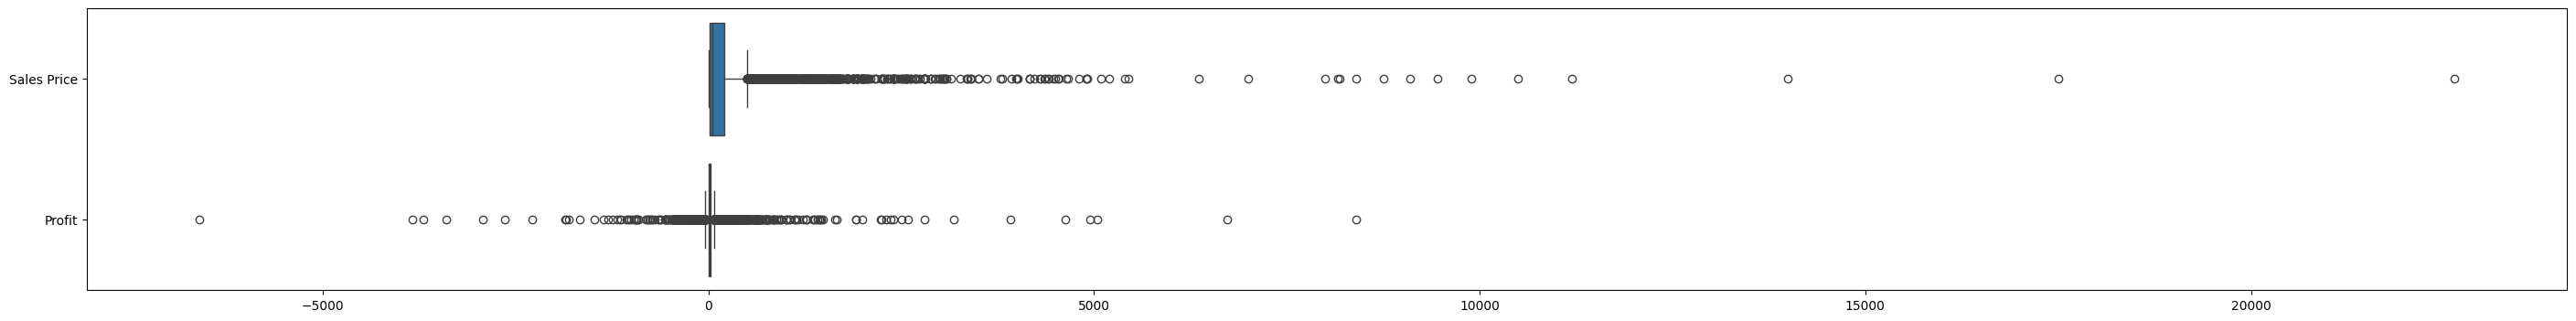

In [363]:
# Seeing outliers in box plot
fig, ax = plt.subplots(figsize=(35,4))
sns.boxplot(data=df[['Sales Price', 'Profit']], orient='h', ax=ax)
plt.savefig('boxPlot.jpg')

In [364]:
# Removes outliers from a DataFrame based on IQR method for a given column. Returns a filtered DataFrame.
def remove_outliers_iqr(df, column, iqr_factor):

    print(f"Original shape: {df.shape}")
    print(f"Processing column: {column}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - iqr_factor * IQR
    upper_whisker = Q3 + iqr_factor * IQR

    filtered_df = df[(df[column] > lower_whisker) & (df[column] < upper_whisker)]

    print(f"After removing outliers from '{column}': {filtered_df.shape}, end='\n'")
    return filtered_df


In [365]:
# Remove outliers from 'Sales Price'
df = remove_outliers_iqr(df, 'Sales Price', 3)

# Remove outliers from 'Profit'
df = remove_outliers_iqr(df, 'Profit', 3)

Original shape: (9994, 22)
Processing column: Sales Price
After removing outliers from 'Sales Price': (9326, 22), end='
'
Original shape: (9326, 22)
Processing column: Profit
After removing outliers from 'Profit': (8451, 22), end='
'


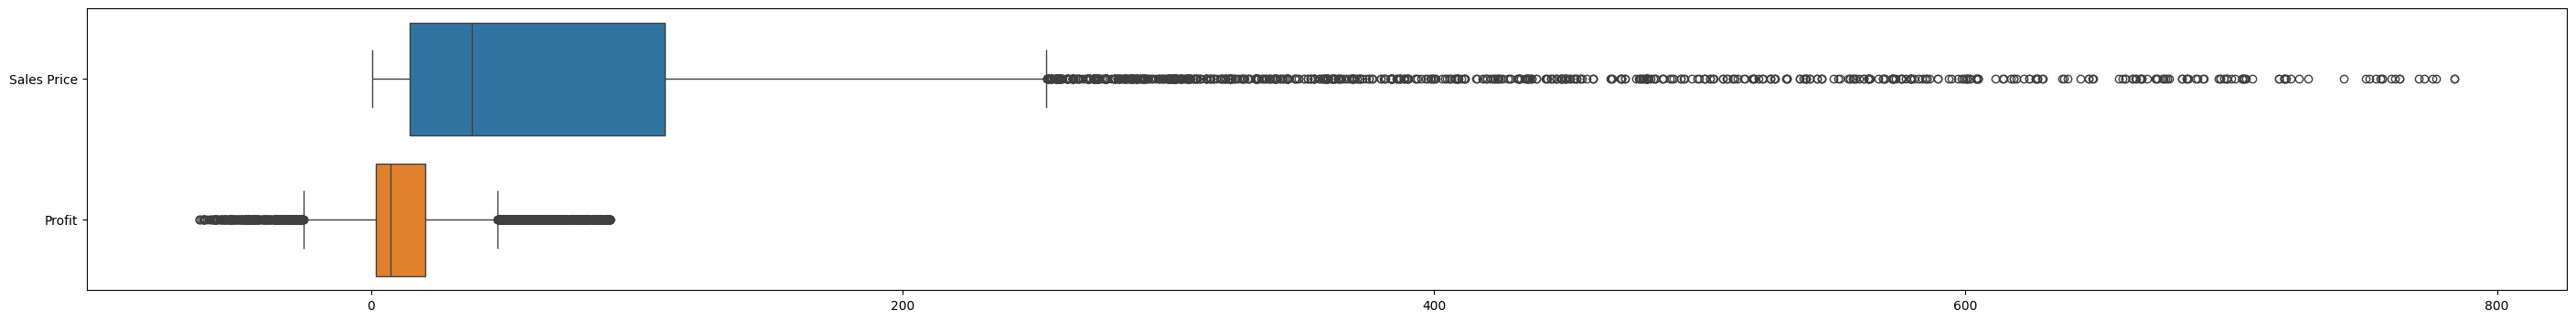

In [366]:
# Seeing outliers in box plot
fig, ax = plt.subplots(figsize=(35,4))
sns.boxplot(data=df[['Sales Price', 'Profit']], orient='h', ax=ax)
plt.savefig('boxPlot.jpg')

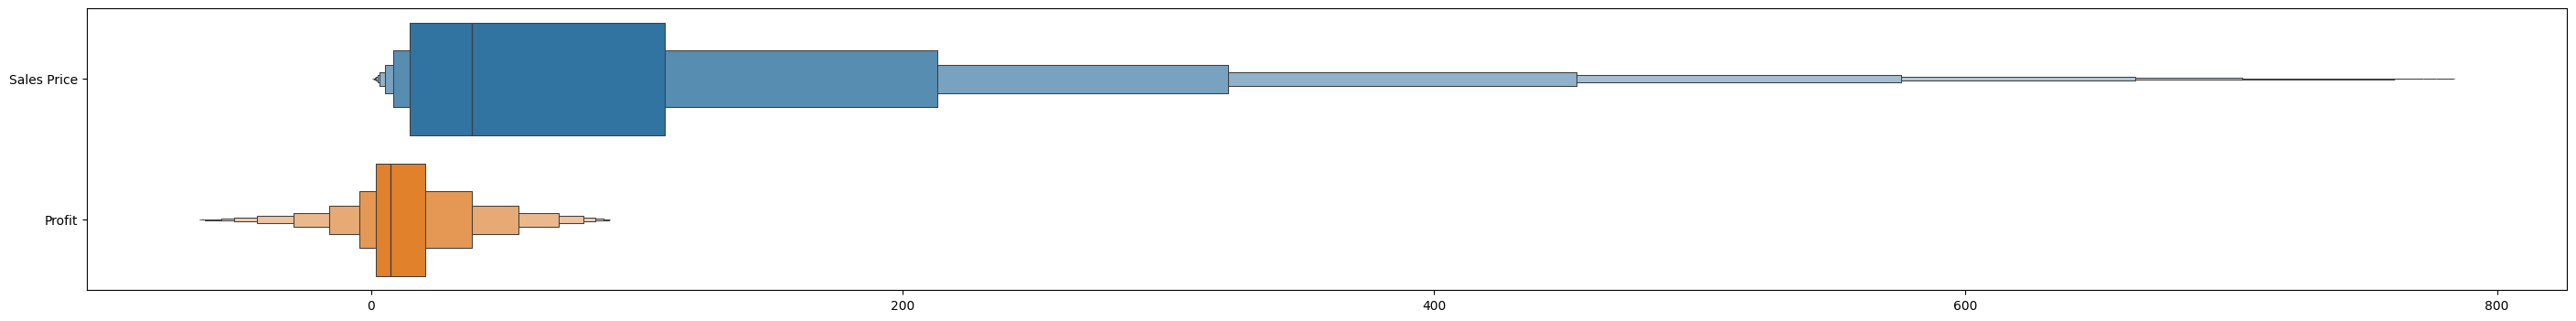

In [367]:
# boxenplot is designed for large datasets and gives more flexibility, though it doesn't use IQR directly—it uses a recursive depth-based approach.
fig, ax = plt.subplots(figsize=(35, 4))
sns.boxenplot(data=df[['Sales Price', 'Profit']], orient='h', ax=ax, k_depth='full') # full - uses all avialable data depth (most detailed)
plt.savefig('boxenPlot.jpg')

Adding new columns for better accountancy.

We noted that Sales Price column is actually Total selling price column which is already multiplied with the quantity. So, we need to create Selling price column per item after the disount is applied.

Similarly Profit column is actually total profit.



```
*   Change Sales Price column name to Total selling price.
*   Change Profit column name to Total profit.

*   Selling Price (per item) = Total Selling Price / Quantity
*   Profit (per item) = Total Profit / Quantity
*   Original Tag Price (per item) = Selling Price (per item) / (1 - Discount)
*   Discounted Price (per item) = Original Tag Price x Discount
*   Cost Price (per item) =Selling Price (per item) - Discounted Price -
Profit (per item)
*   Total Discounted Price =Discounted Price x Quantity
```



Note: We are presuming no discrepency in profit data. Negative profit is taken as loss.

In [368]:
# Rename columns
df.rename(columns={
    'Sales Price': 'Total Selling Price',
    'Profit': 'Total Profit'
}, inplace=True)

df['Selling Price (per item)'] = df['Total Selling Price'] / df['Quantity']

df['Profit (per item)'] = df['Total Profit'] / df['Quantity']

df['Original Tag Price (per item)'] = df['Selling Price (per item)'] / (1 - df['Discount'])

df['Discounted Price (per item)'] = df['Original Tag Price (per item)'] * df['Discount']

df['Cost Price (per item)'] = df['Selling Price (per item)'] - df['Profit (per item)']

df['Total Cost Price'] = df['Total Selling Price'] - df['Total Profit']

df['Total Discounted Price'] = df['Discounted Price (per item)'] * df['Quantity']

df.iloc[:5, -10:].T

,0,2,4,5,6
Discount,0.0,0.0,0.2,0.0,0.0
Total Profit,41.9136,6.8714,2.5164,14.1694,1.9656
Days to Ship,3,4,7,5,5
Selling Price (per item),130.98,7.31,11.184,6.98,1.82
Profit (per item),20.9568,3.4357,1.2582,2.0242,0.4914
Original Tag Price (per item),130.98,7.31,13.98,6.98,1.82
Discounted Price (per item),0.0,0.0,2.796,0.0,0.0
Cost Price (per item),110.0232,3.8743,9.9258,4.9558,1.3286
Total Cost Price,220.0464,7.7486,19.8516,34.6906,5.3144
Total Discounted Price,0.0,0.0,5.592,0.0,0.0


In [369]:
desired_columns = [
    # Core identifiers
    'Row ID',
    'Order ID',
    'Order Date',
    'Ship Date',
    'Days to Ship',
    'Ship Mode',
    'Customer ID',
    'Customer Name',
    'Segment',
    'Country',
    'City',
    'State',
    'Postal Code',
    'Region',

    # Product details
    'Product ID',
    'Category',
    'Sub-Category',
    'Product Name',

    # Per-item financials
    'Selling Price (per item)',
    'Profit (per item)',
    'Original Tag Price (per item)',
    'Discounted Price (per item)',
    'Cost Price (per item)',

    # Quantity
    'Quantity',

    # Total value columns (grouped at the end)
    'Total Cost Price',
    'Total Discounted Price',
    'Total Selling Price',
    'Total Profit',
]
df = df[desired_columns]
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Days to Ship,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Selling Price (per item),Profit (per item),Original Tag Price (per item),Discounted Price (per item),Cost Price (per item),Quantity,Total Cost Price,Total Discounted Price,Total Selling Price,Total Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire,Consumer,United States,...,130.98,20.9568,130.98,0.0,110.0232,2,220.0464,0.0,261.96,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin,Corporate,United States,...,7.31,3.4357,7.31,0.0,3.8743,2,7.7486,0.0,14.62,6.8714


Creating Shiping Urgency column based on Days to Ship.

In [370]:
# Define conditions
conditions = [
    df['Days to Ship'] == 0,
    (df['Days to Ship'] >= 1) & (df['Days to Ship'] <= 3),
    df['Days to Ship'] > 3
]

# Define corresponding labels
choices = ['Immediate', 'Urgent', 'Standard']

# Create the new column
df['Shipping Urgency'] = np.select(conditions, choices, default='Unknown')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Days to Ship,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Profit (per item),Original Tag Price (per item),Discounted Price (per item),Cost Price (per item),Quantity,Total Cost Price,Total Discounted Price,Total Selling Price,Total Profit,Shipping Urgency
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire,Consumer,United States,...,20.9568,130.98,0.0,110.0232,2,220.0464,0.0,261.96,41.9136,Urgent
2,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin,Corporate,United States,...,3.4357,7.31,0.0,3.8743,2,7.7486,0.0,14.62,6.8714,Standard


Creating Total_Sales_Amount_per_customer, Total_Quantity_per_customer, Total_Discounted_Amount_per_customer and merging them to original df.

In [371]:
customer_totals = df.groupby('Customer ID').agg(
    Total_Sales_Amount_per_customer=('Total Selling Price', 'sum'),
    Total_Quantity_per_customer=('Quantity', 'sum'),
    Total_Discounted_Amount_per_customer=('Total Discounted Price', 'sum')
).reset_index()

df = df.merge(customer_totals, on='Customer ID', how='left')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Days to Ship,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Cost Price (per item),Quantity,Total Cost Price,Total Discounted Price,Total Selling Price,Total Profit,Shipping Urgency,Total_Sales_Amount_per_customer,Total_Quantity_per_customer,Total_Discounted_Amount_per_customer
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire,Consumer,United States,...,110.0232,2,220.0464,0.0,261.96,41.9136,Urgent,285.464,5,5.876
1,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin,Corporate,United States,...,3.8743,2,7.7486,0.0,14.62,6.8714,Standard,397.608,22,123.672


Customer Segmentation and Analysis

Customer Sales Quintile and Customer Profit Quintile



```
Quintiles divide data into 5 equal parts (20% each).
Q1 = bottom 20%, Q5 = top 20%
Helps identify top-performing customers in terms of sales and profit.
```



In [372]:
# Step 1: Aggregate total sales and profit per customer
customer_metrics = df.groupby('Customer ID').agg(
    Total_Sales=('Total Selling Price', 'sum'),
    Total_Profit=('Total Profit', 'sum')
).reset_index()

In [373]:
# Step 2: Assign quintiles
customer_metrics['Sales Quintile'] = pd.qcut(customer_metrics['Total_Sales'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
customer_metrics['Profit Quintile'] = pd.qcut(customer_metrics['Total_Profit'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

In [374]:
# Step 3: Merge back to original DataFrame
df = df.merge(customer_metrics[['Customer ID', 'Sales Quintile', 'Profit Quintile']], on='Customer ID', how='left')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Days to Ship,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Total Cost Price,Total Discounted Price,Total Selling Price,Total Profit,Shipping Urgency,Total_Sales_Amount_per_customer,Total_Quantity_per_customer,Total_Discounted_Amount_per_customer,Sales Quintile,Profit Quintile
0,1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire,Consumer,United States,...,220.0464,0.0,261.96,41.9136,Urgent,285.464,5,5.876,Q1,Q2
1,3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin,Corporate,United States,...,7.7486,0.0,14.62,6.8714,Standard,397.608,22,123.672,Q1,Q1


In [375]:
# Step 4: Create cross-tabulation grid
cross_grid = pd.crosstab(df['Sales Quintile'], df['Profit Quintile'])
print(cross_grid)

Profit Quintile   Q1   Q2   Q3   Q4    Q5
Sales Quintile                           
Q1               384  354  108    6     0
Q2               181  374  405  331    37
Q3               198  313  383  465   249
Q4               165  140  451  534   698
Q5               130  165  246  579  1555




```
# Inferences:
1. Strong Positive Correlation Between Sales and Profit
Q5 Sales & Q5 Profit has 1555 customers - suggests that top-selling customers tend to be top-profit customers.

2. Low Sales = Low Profit
Very few Q1 sales customers appear in higher profit quintiles—only 6 in Q4, 0 in Q5 - Indicates that low sales rarely yield high profit.

3. Middle Quintiles Show Mixed Behavior
Q2 and Q3 sales customers are spread across all profit quintiles, showing variability. These segments may include customers with inconsistent pricing, discounting, or cost structures.

4. Outliers and Strategic Opportunities
Some customers in Q2 Sales but Q5 Profit (37 customers) may be high-margin buyers. These could be targeted for upselling or loyalty programs.
```



Focus retention and rewards on Q5–Q5 customers.

Investigate Q2/Q3 Sales with Q5 Profit for high-margin opportunities.

Avoid over-investing in Q1–Q1 customers unless strategic.

Analyze middle quintiles to understand what drives profit variability.

**Top 10 Most Profitable Products**

/tmp/ipython-input-376-2892434042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_products.values, y=top_profit_products.index, palette='Greens_r')


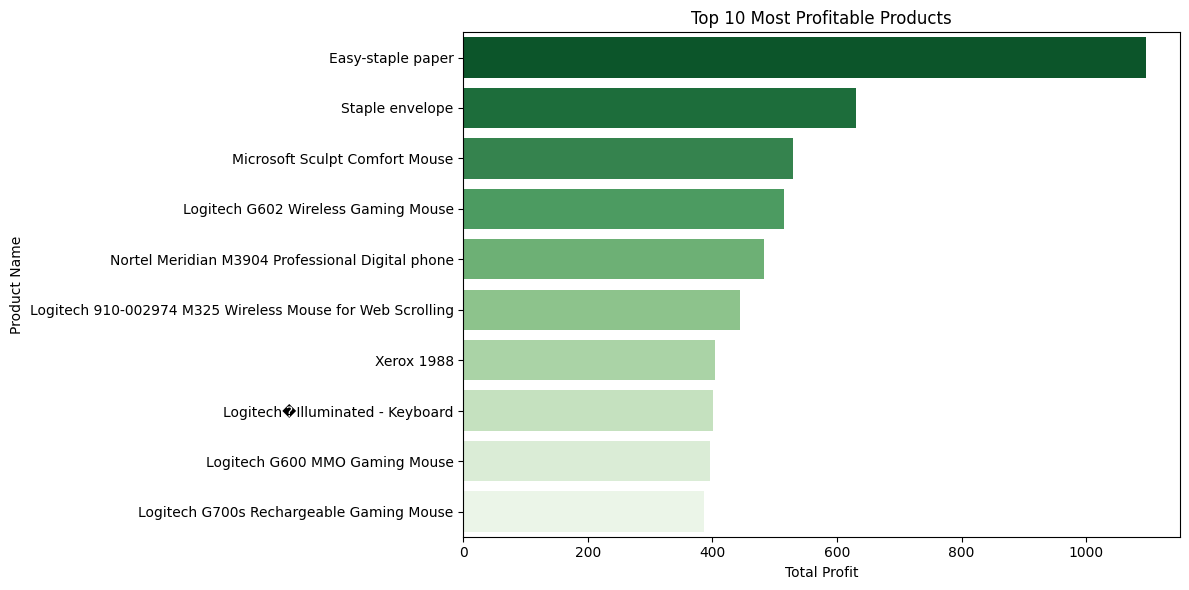

In [376]:
top_profit_products = df.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_profit_products.values, y=top_profit_products.index, palette='Greens_r')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('top_profitable_products.jpg')

Top 10 Most Loss-Making Products

/tmp/ipython-input-377-4222339791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_products.values, y=loss_products.index, palette='Reds')


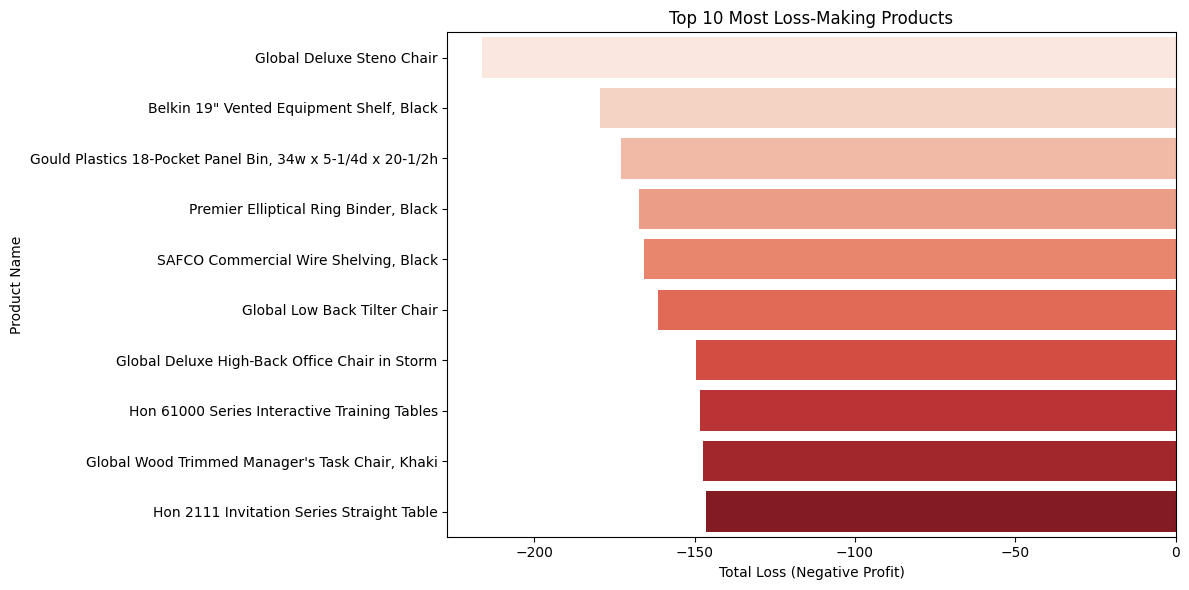

In [377]:
loss_products = df.groupby('Product Name')['Total Profit'].sum().sort_values().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=loss_products.values, y=loss_products.index, palette='Reds')
plt.title('Top 10 Most Loss-Making Products')
plt.xlabel('Total Loss (Negative Profit)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('top_loss_making_products.jpg')

Sales vs. Profit Correlation

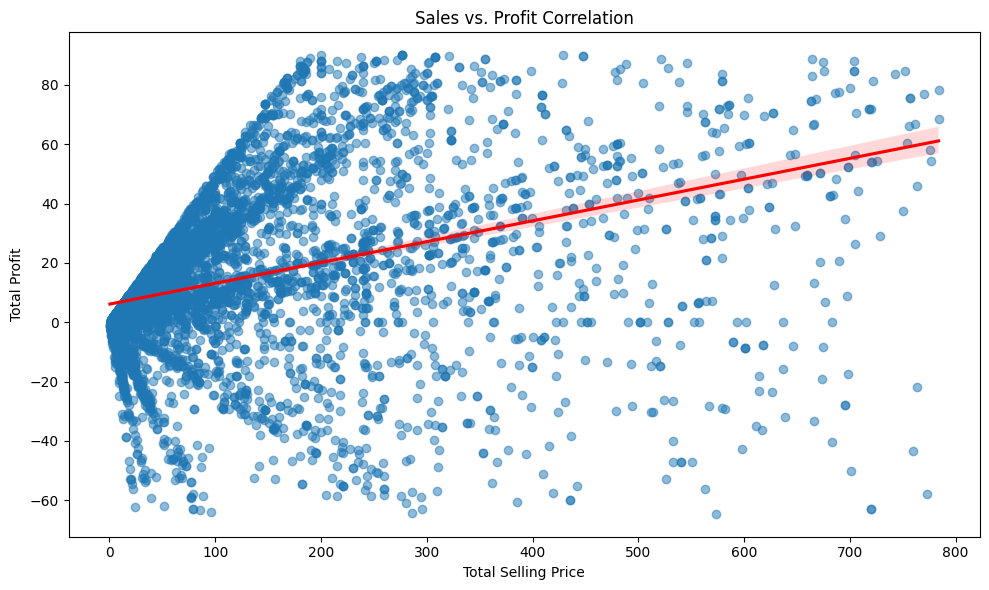

In [378]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Total Selling Price',
    y='Total Profit',
    data=df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Sales vs. Profit Correlation')
plt.xlabel('Total Selling Price')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.savefig('sales_vs_profit_correlation.jpg')



```
The regression line shows the overall trend between sales and profit.

Positive slope: Indicates that higher sales generally lead to higher profit.

Tight clustering around the line: Suggests a strong correlation.

Wide scatter: Implies variability—some high sales may still yield low profit due to discounts or high costs.

Outliers: Points far from the line may represent unusually profitable or loss-making transactions.
```



Joint Distribution of Sales and Profit

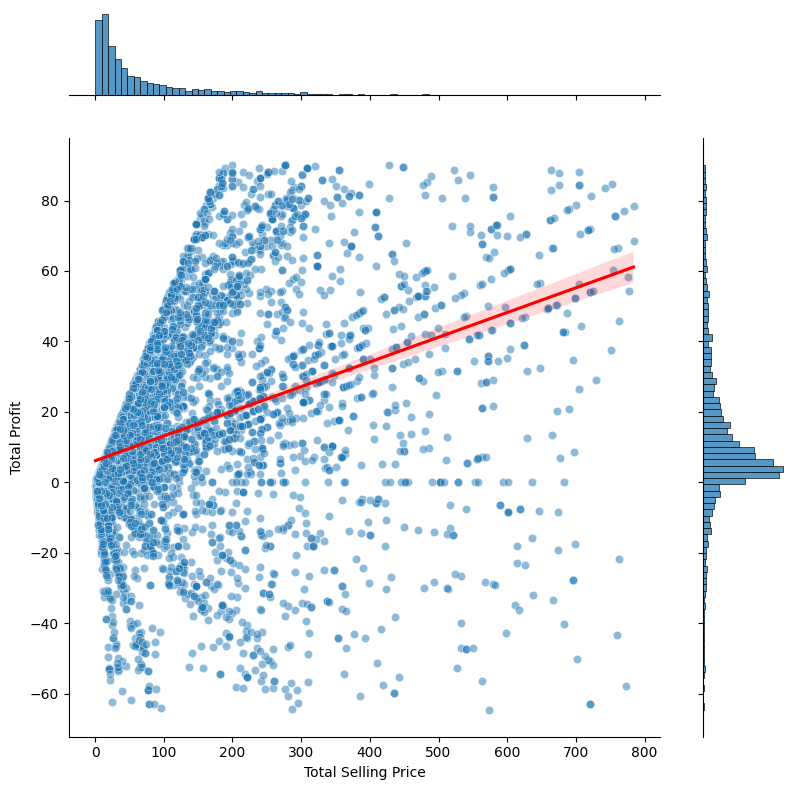

In [379]:
sns.jointplot(
    data=df,
    x='Total Selling Price',
    y='Total Profit',
    kind='scatter',
    height=8,
    space=0.5,
    alpha=0.5
).plot_joint(sns.regplot, scatter=False, color='red')
plt.savefig('joint_distribution_sales_profit.jpg')



```
Combines a scatter plot with histograms on both axes.
Center: Scatter plot showing how sales and profit relate across all products.

Density of points: Reveals where most transactions lie (e.g., low sales, low profit).

Histogram peaks: Show common sales and profit ranges.

Clusters: Help identify product groups or customer segments with similar behavior.

Regression overlay: Adds trend insight, similar to Plot 3.
```



We already created a cross_plot for Customer Sales Quintile & Customer Profit Quintile.

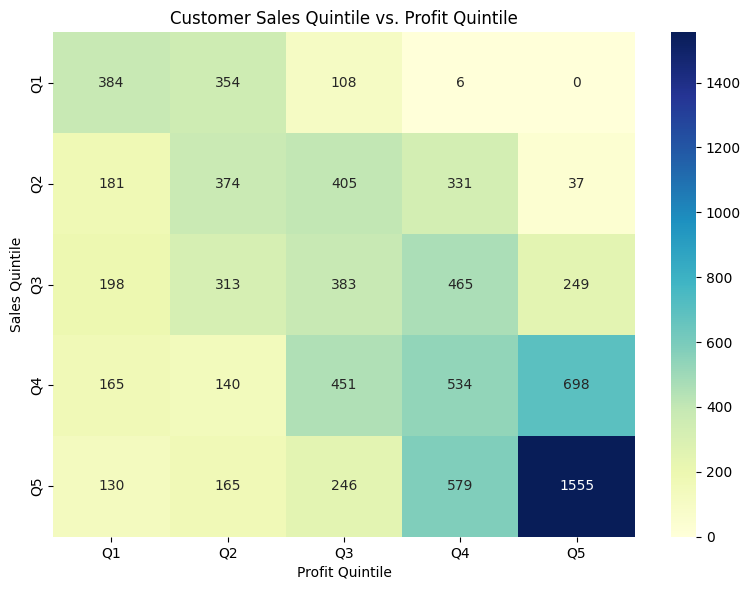

In [380]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_grid, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Sales Quintile vs. Profit Quintile')
plt.xlabel('Profit Quintile')
plt.ylabel('Sales Quintile')
plt.tight_layout()
plt.savefig('customer_quintile_heatmap.jpg')




```
Darker cells = more customers in that segment.
Bottom-right (Q5–Q5) = most valuable customers.
Top-left (Q1–Q1) = least valuable.
```



Pivot Table: Category vs. Segment Performance

In [381]:
pivot = df.pivot_table(
    index='Category',
    columns='Segment',
    values=['Total Selling Price', 'Total Profit'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)
pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values] # Flatten the multi-index columns
pivot_sorted = pivot.sort_values(by='Total Profit_Total', ascending=False)
pivot_sorted

,Total Profit_Consumer,Total Profit_Corporate,Total Profit_Home Office,Total Profit_Total,Total Selling Price_Consumer,Total Selling Price_Corporate,Total Selling Price_Home Office,Total Selling Price_Total
Category,,,,,,,,
Total,55267.7280,30810.4015,19465.5708,105543.7003,412285.0761,226261.6283,130400.5836,768947.288
Office Supplies,30534.2016,17347.5420,11206.9739,59088.7175,155948.6620,91376.7520,52821.5940,300147.008
Technology,15569.4784,8315.3875,5390.8101,29275.6760,114749.6140,58860.6480,37998.6070,211608.869
Furniture,9164.0480,5147.4720,2867.7868,17179.3068,141586.8001,76024.2283,39580.3826,257191.411


sorted pivot table showing which categories are most profitable across all segments.

**Distribution of Shipping Urgency (Pie or Bar Chart)**

/tmp/ipython-input-382-2515323483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Shipping Urgency', palette='Set2')


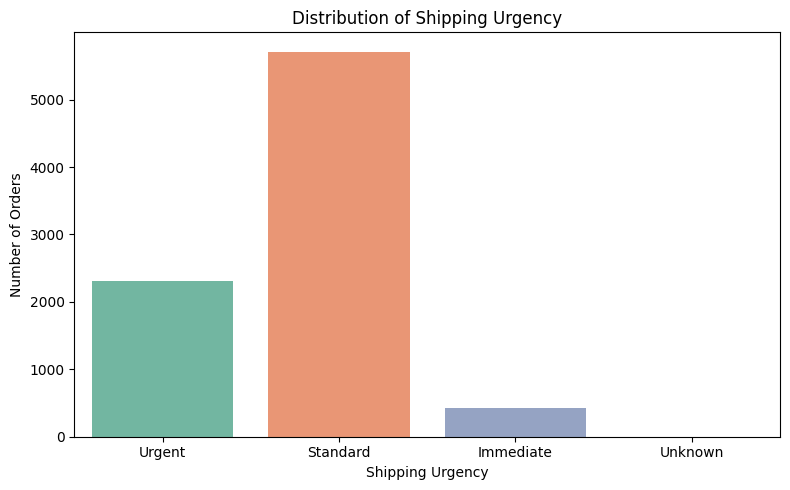

In [382]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Shipping Urgency', palette='Set2')
plt.title('Distribution of Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('shipping_urgency_bar.jpg')

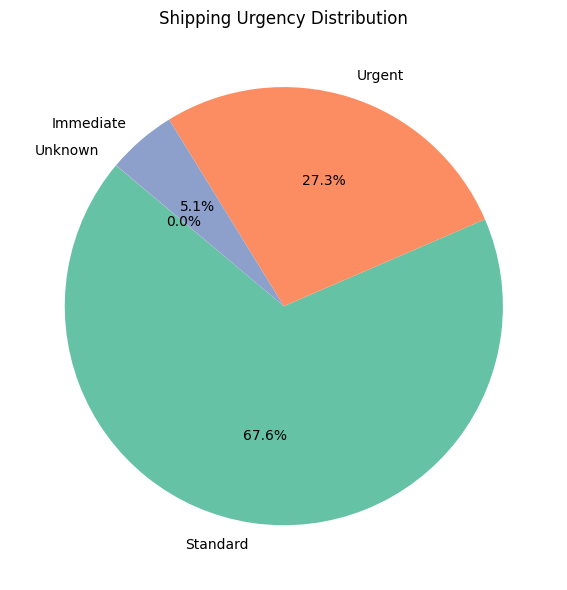

In [383]:
urgency_counts = df['Shipping Urgency'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(urgency_counts, labels=urgency_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Shipping Urgency Distribution')
plt.tight_layout()
plt.savefig('shipping_urgency_pie.jpg')

**Days to Ship vs. Profit (Violin Plot)**

/tmp/ipython-input-384-1461762785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Days to Ship', y='Total Profit', palette='coolwarm')


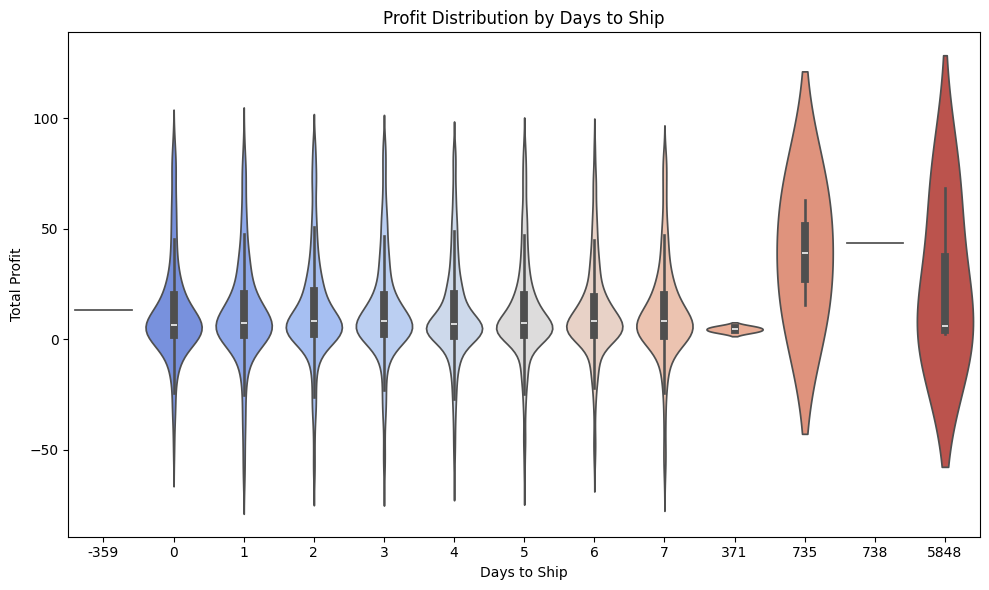

In [384]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Days to Ship', y='Total Profit', palette='coolwarm')
plt.title('Profit Distribution by Days to Ship')
plt.xlabel('Days to Ship')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.savefig('days_to_ship_vs_profit_violin.jpg')

Insight: This shows how profit varies with shipping speed. Wider violins = more variability.

Shipping Mode and Profitability (Grouped Bar Chart)

/tmp/ipython-input-385-4077953886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='Blues_d')


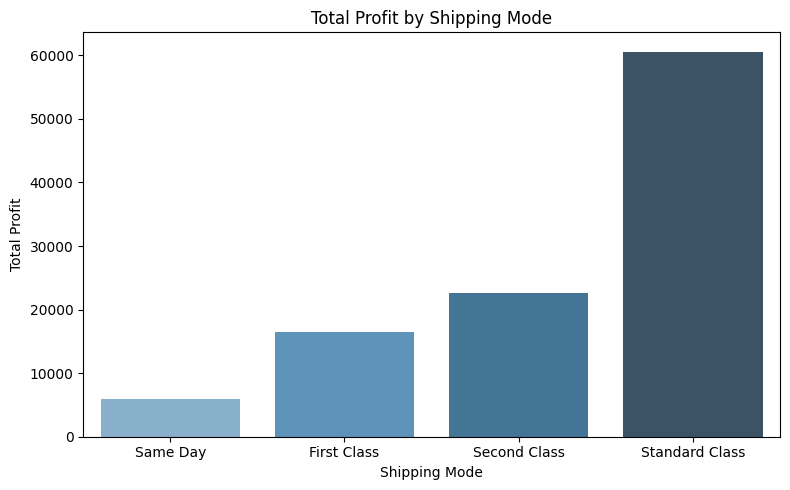

In [385]:
shipping_profit = df.groupby('Ship Mode')['Total Profit'].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=shipping_profit.index, y=shipping_profit.values, palette='Blues_d')
plt.title('Total Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.savefig('shipping_mode_profitability.jpg')

Pivot Table: Region vs. Ship Mode

In [386]:
pivot_shipping = df.pivot_table(
    index='Region',
    columns='Ship Mode',
    values=['Order ID', 'Total Selling Price', 'Total Profit'],
    aggfunc={
        'Order ID': 'count',
        'Total Selling Price': 'sum',
        'Total Profit': 'sum'
    },
    margins=True,
    margins_name='Total'
)
pivot_shipping.columns = ['_'.join(col).strip() for col in pivot_shipping.columns.values]
pivot_shipping = pivot_shipping.sort_values(by='Total Profit_Total', ascending=False)
pivot_shipping

,Order ID_First Class,Order ID_Same Day,Order ID_Second Class,Order ID_Standard Class,Order ID_Total,Total Profit_First Class,Total Profit_Same Day,Total Profit_Second Class,Total Profit_Standard Class,Total Profit_Total,Total Selling Price_First Class,Total Selling Price_Same Day,Total Selling Price_Second Class,Total Selling Price_Standard Class,Total Selling Price_Total
Region,,,,,,,,,,,,,,,
Total,1318.0,454.0,1641.0,5038.0,8451,16476.7945,5861.8564,22611.9328,60593.1166,105543.7003,122896.6457,40905.007,154457.2879,450688.3474,768947.288
West,452.0,164.0,543.0,1630.0,2789,6814.1403,2438.3193,9367.3942,24567.2336,43187.0874,48970.7545,16770.382,58666.9445,168011.6000,292419.681
East,409.0,121.0,440.0,1394.0,2364,4780.7963,1650.3857,5222.1100,16430.7063,28083.9983,31982.0070,10262.664,36860.8080,112415.9850,191521.464
South,201.0,69.0,275.0,830.0,1375,2927.3720,966.5039,4370.9144,10510.0887,18774.8790,18996.5460,5801.535,26054.9480,72535.9910,123389.020
Central,256.0,100.0,383.0,1184.0,1923,1954.4859,806.6475,3651.5142,9085.0880,15497.7356,22947.3382,8070.426,32874.5874,97724.7714,161617.123


Insights

Which regions prefer which shipping modes (based on order count).

Which combinations yield the highest total sales and profit.

Whether faster shipping correlates with higher profitability in certain regions.

Sales and Profit by Region (Bar Chart or Map)

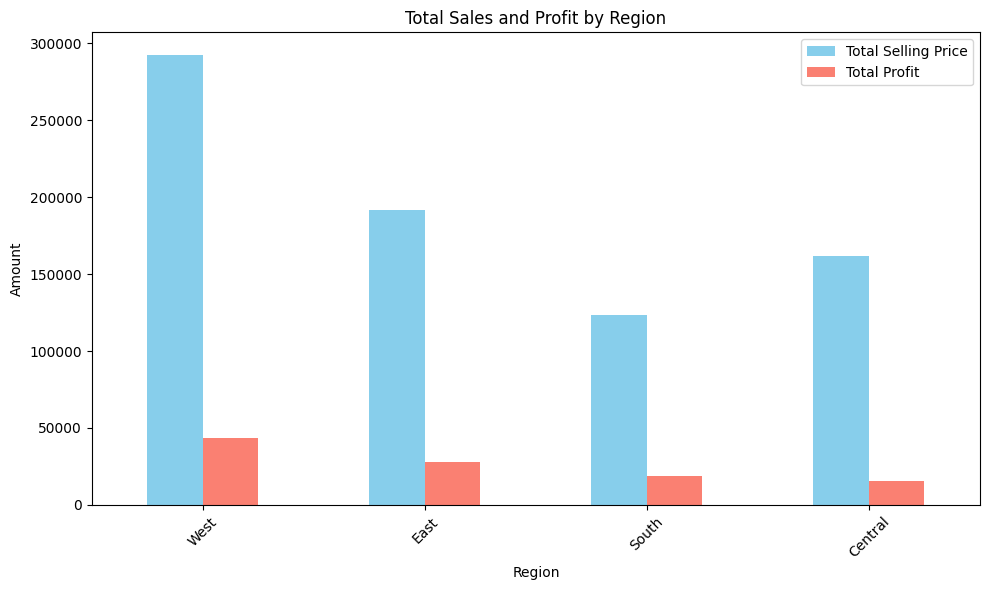

In [387]:
region_metrics = df.groupby('Region')[['Total Selling Price', 'Total Profit']].sum().sort_values(by='Total Profit', ascending=False)

region_metrics.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Total Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_profit_by_region.jpg')

State-wise Profitability (Pivot Table)
python

In [388]:
state_profit = df.pivot_table(
    index='State',
    values='Total Profit',
    aggfunc='sum'
).sort_values(by='Total Profit', ascending=False)

print(state_profit.head(5))   # Top 5 profitable states
print(state_profit.tail(5))  # Bottom 5 profitable states


            Total Profit
State                   
California    30357.1689
New York      16801.3665
Washington     7840.6329
Michigan       5103.1421
Virginia       4178.5846
               Total Profit
State                      
Ohio                76.9529
North Dakota        68.0549
West Virginia       43.4336
Pennsylvania      -128.5627
Illinois          -276.8541


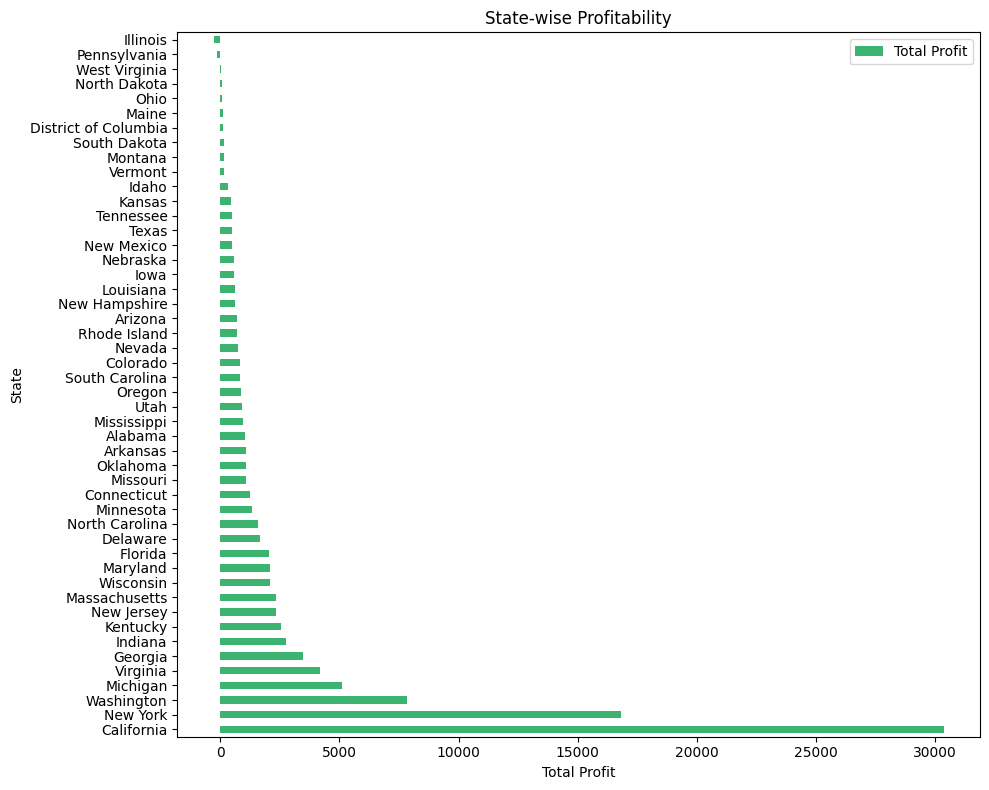

In [389]:
state_profit.plot(kind='barh', figsize=(10, 8), color='mediumseagreen')
plt.title('State-wise Profitability')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('state_profitability.jpg')

show which regions/states are driving revenue and profit.

Correlation Between State and Profit (Label Encoding + Correlation Plot)

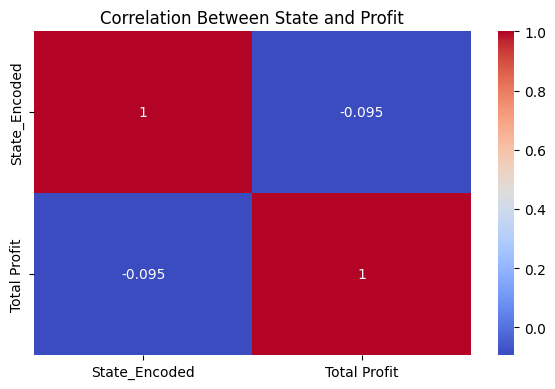

In [390]:
# Step 1: Label Encode the State column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['State_Encoded'] = le.fit_transform(df['State'])

# Step 2: Correlation Plot
corr_matrix = df[['State_Encoded', 'Total Profit']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between State and Profit')
plt.tight_layout()
plt.savefig('state_profit_correlation.jpg')

Correlation plot reveals whether geographic location (encoded numerically) has any linear relationship with profit.

Impact of Discounts on Profitability (Scatter + Trend Line)

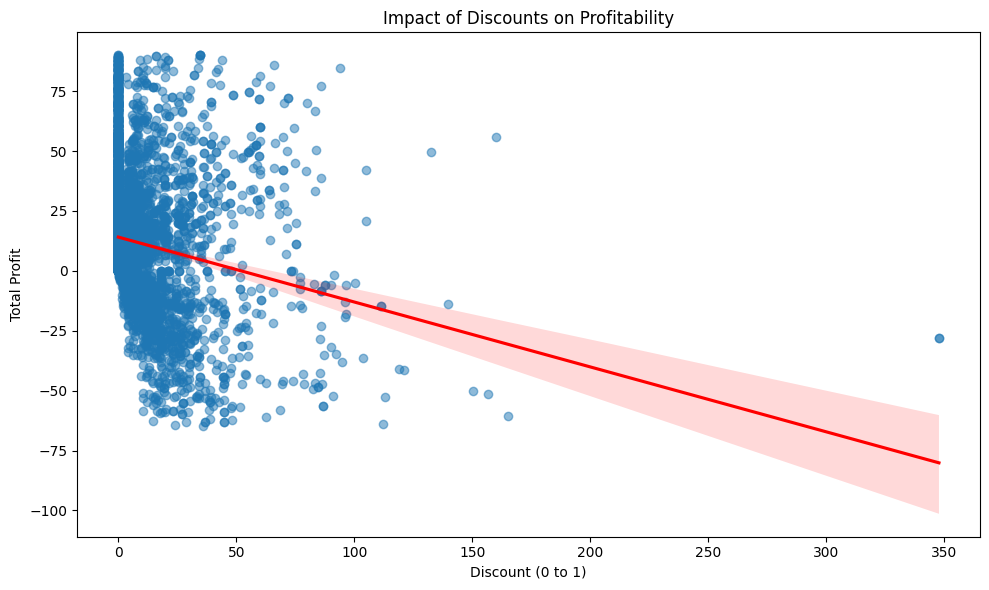

In [391]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Discounted Price (per item)',
    y='Total Profit',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Impact of Discounts on Profitability')
plt.xlabel('Discount (0 to 1)')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.savefig('discount_vs_profit_filtered.jpg')

Negative slope: Suggests that higher discounts reduce profit.

Clusters: May reveal thresholds where discounts become unprofitable.

Outliers: Could indicate products with high discounts but still profitable (e.g., high-margin items).

**Original Price vs. Discounted Price by Category or Sub-Category**

<Figure size 1200x600 with 0 Axes>

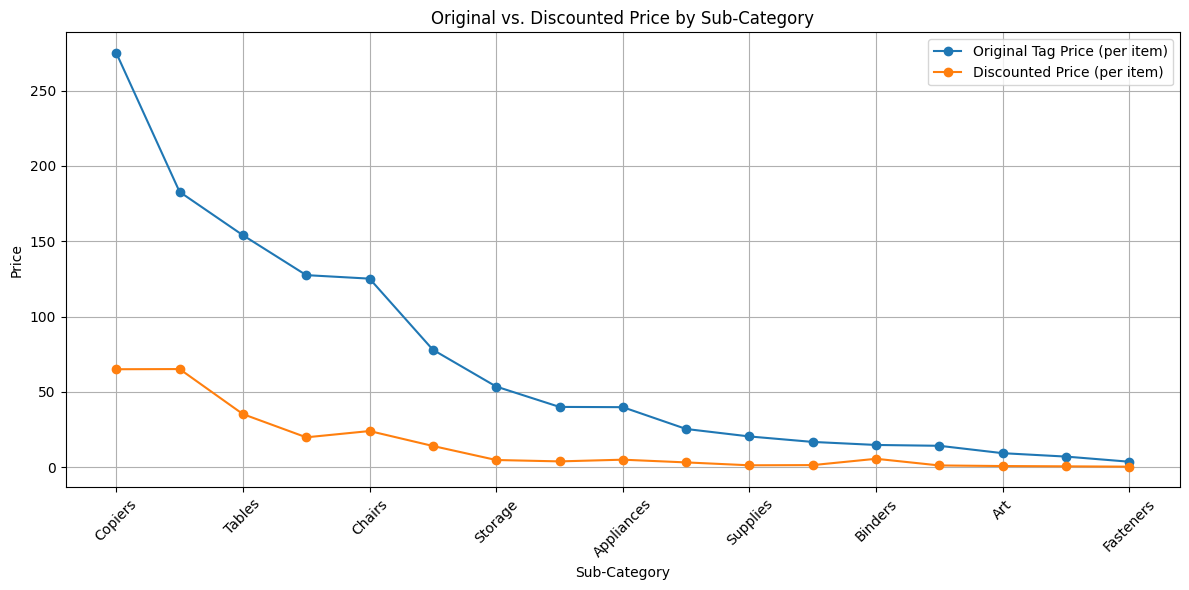

In [392]:
# Line Plot by Sub-Category
price_comparison = df.groupby('Sub-Category')[['Original Tag Price (per item)', 'Discounted Price (per item)']].mean().sort_values(by='Original Tag Price (per item)', ascending=False)

plt.figure(figsize=(12, 6))
price_comparison.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Original vs. Discounted Price by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('original_vs_discounted_price.jpg')

Gap between lines = average discount impact.

Steep drops = categories with aggressive discounting.

Flat lines = categories with stable pricing.

**Sales and Profit Trends Over Time (Time Series Plot)**

<Figure size 5000x2000 with 0 Axes>

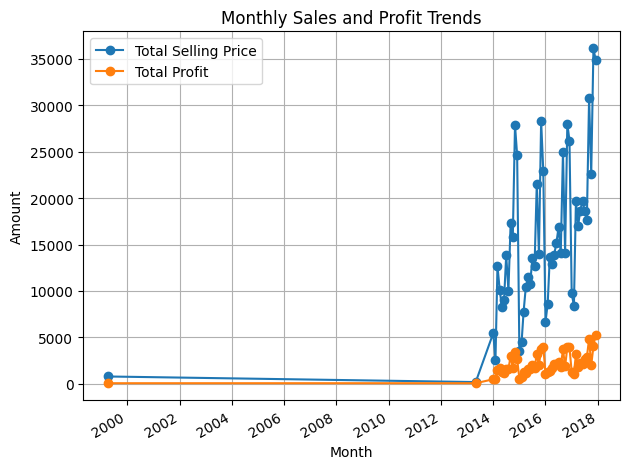

In [393]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')
# Aggregate by Month
monthly_trends = df.groupby('YearMonth')[['Total Selling Price', 'Total Profit']].sum()
monthly_trends.index = monthly_trends.index.to_timestamp()

plt.figure(figsize=(50, 20))
monthly_trends.plot(marker='o')
plt.title('Monthly Sales and Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_profit_trends.jpg')

**Order Frequency by Month**

/tmp/ipython-input-394-2795079445.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_freq.index, y=order_freq.values, palette='viridis')


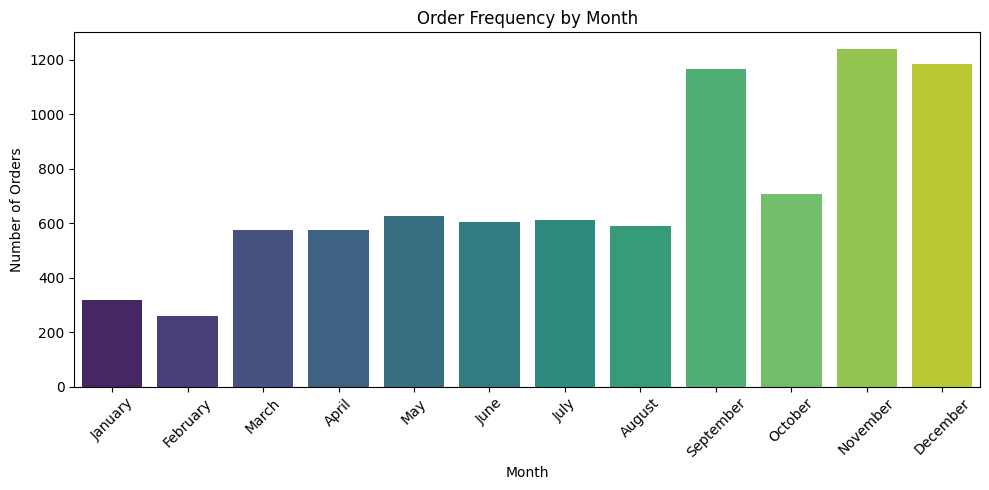

In [394]:
# Extract Month and Count Orders
df['Month'] = df['Order Date'].dt.month_name()
order_freq = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 5))
sns.barplot(x=order_freq.index, y=order_freq.values, palette='viridis')
plt.title('Order Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_order_frequency.jpg')

**Yearly Growth in Sales and Profit**

<Figure size 1000x600 with 0 Axes>

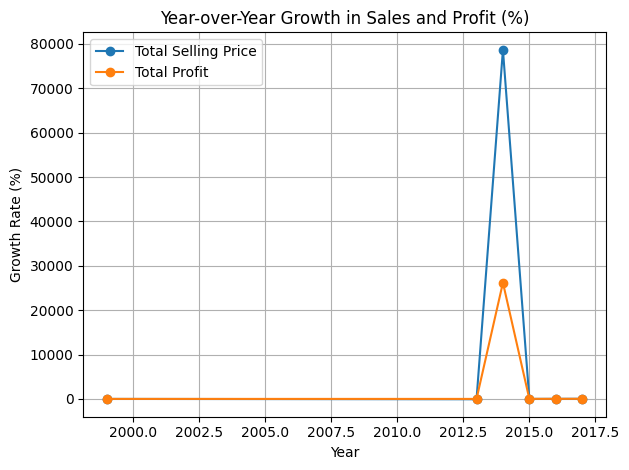

In [395]:
# Extract Year and Aggregate
df['Year'] = df['Order Date'].dt.year
yearly_metrics = df.groupby('Year')[['Total Selling Price', 'Total Profit']].sum()

# Calculate Year-over-Year Growth
yearly_growth = yearly_metrics.pct_change().fillna(0) * 100

plt.figure(figsize=(10, 6))
yearly_growth.plot(marker='o')
plt.title('Year-over-Year Growth in Sales and Profit (%)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_growth_sales_profit.jpg')

Seasonal spikes in sales or orders (e.g., festive months).

Growth trends year-over-year—identify strong or weak years.

Monthly order frequency can guide staffing, inventory, or marketing.

In [396]:
df.to_excel(r'output.xlsx', index=False) # index false means Don't write the DataFrame's index as a separate column in the Excel file.
 # r means raw string literal. In regular strings, the backslash \ is treated as an escape character. We are saying “Treat all backslashes as literal characters—don’t interpret them.”
 # Without r, you'd need to escape every backslash: 'C:\\new_folder\\file.xlsx'